# Demo of Wine Quality Using PyTorch DeepLearning

In [4]:
#Import libraries
import torch
import torchvision
import matplotlib
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision.datasets.utils import download_url
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn as nn
import torch.nn.functional as F
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Download data using PyTorch
white_wine_dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
download_url(white_wine_dataset_url,'./data')
data_dir = './data'

Using downloaded and verified file: ./data\winequality-white.csv


In [6]:
#load dataset of redwine from csv file and store as pandas dataframe
white_wine_dataset = pd.read_csv(data_dir+'/winequality-white.csv',delimiter=';')
white_wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
#Splitting the dataset
X_white = list(white_wine_dataset.columns)[0:11]
y_white = list(white_wine_dataset.columns)[-1]
X_white, y_white

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 'quality')

## Conversion Time! Pandas to NumPy to PyTorch Tensors

In [9]:
#Define a function to make array class that goes to NumPy
def pdDataframe_to_npArray(pdDataframe):
    dataframe = pdDataframe.copy(deep=True)
    # Extract input & outupts as numpy arrays
    X_white_array = dataframe[X_white].to_numpy()
    y_white_array = dataframe[y_white].to_numpy()
    return X_white_array, y_white_array

In [10]:
#Show the change
X_white_array, y_white_array = pdDataframe_to_npArray(white_wine_dataset)
X_white_array, y_white_array

(array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
        [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
        [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
        [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
        [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]]),
 array([6, 6, 6, ..., 6, 7, 6], dtype=int64))

In [11]:
#Change from NumPy to Tensors
X_white = torch.from_numpy(X_white_array).type(torch.float)
y_white = torch.from_numpy(y_white_array).type(torch.float)
X_white,y_white

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 tensor([6., 6., 6.,  ..., 6., 7., 6.]))

In [12]:
#Print to confirm
print(X_white.shape, y_white.shape)
print(X_white.dtype, y_white.dtype)

torch.Size([4898, 11]) torch.Size([4898])
torch.float32 torch.float32


In [13]:
#Throw the tensor in a dataset
dataset = TensorDataset(X_white, y_white)
dataset

# Deep Learning Model Creation

In [23]:
#Create our deep learning model
#Manual_seed used to generate the same dataset every time cell is run
torch.manual_seed(0)

val_size = 848
test_size = 50
train_size = num_rows - val_size - test_size
print(train_size,val_size,test_size)

#Random split is used randomly split our data everytime cell is run
train_ds, val_ds, test_ds = random_split(dataset,[train_size,val_size,test_size])

4000 848 50


In [15]:
#Set our batch and loaders
batch_size = 100
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [24]:
#Creating our model and staging process
input_size = 11
output_size = 1
hidden_layer1_size = 64


class WineModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size,hidden_layer1_size),
            nn.Sigmoid(),
            nn.Linear(hidden_layer1_size,output_size)
            )
        
    def forward(self,xb):
        out = self.network(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.mse_loss(out,targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        #print(inputs,targets)
        # Generate predictions
        out = self(inputs)
        #print(out)
        # Calculate loss
        loss = F.mse_loss(out,targets)
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))
lr_rate = 0.001

In [25]:
#Creating the evaluation and fit functions. Optimizer used from PyTorch is SGD which allows us to use the gradient descent algorithm 
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [26]:
#Create model to pass through our fit function
model = WineModel()

In [30]:
epochs = 500
lr = 0.001
history = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 0.7469
Epoch [40], val_loss: 0.7462
Epoch [60], val_loss: 0.7466
Epoch [80], val_loss: 0.7464
Epoch [100], val_loss: 0.7475
Epoch [120], val_loss: 0.7476
Epoch [140], val_loss: 0.7461
Epoch [160], val_loss: 0.7465
Epoch [180], val_loss: 0.7474
Epoch [200], val_loss: 0.7471
Epoch [220], val_loss: 0.7474
Epoch [240], val_loss: 0.7458
Epoch [260], val_loss: 0.7458
Epoch [280], val_loss: 0.7462
Epoch [300], val_loss: 0.7479
Epoch [320], val_loss: 0.7465
Epoch [340], val_loss: 0.7461
Epoch [360], val_loss: 0.7469
Epoch [380], val_loss: 0.7481
Epoch [400], val_loss: 0.7472
Epoch [420], val_loss: 0.7464
Epoch [440], val_loss: 0.7475
Epoch [460], val_loss: 0.7467
Epoch [480], val_loss: 0.7461
Epoch [500], val_loss: 0.7462


In [28]:
#Here we are creating our prediction function for our trained model. Unsqueeze is make the dimensions match.
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)             
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [29]:
#Run our model to get our the results
for element in test_ds:
    input,target = element
    predict_single(input, target, model)

Input: tensor([6.5000e+00, 4.6000e-01, 4.1000e-01, 1.6800e+01, 8.4000e-02, 5.9000e+01,
        2.2200e+02, 9.9930e-01, 3.1800e+00, 5.8000e-01, 9.0000e+00])
Target: tensor(5.)
Prediction: tensor([5.8967])
Input: tensor([5.3000e+00, 2.0000e-01, 3.1000e-01, 3.6000e+00, 3.6000e-02, 2.2000e+01,
        9.1000e+01, 9.9278e-01, 3.4100e+00, 5.0000e-01, 9.8000e+00])
Target: tensor(6.)
Prediction: tensor([5.8966])
Input: tensor([7.2000e+00, 1.6000e-01, 2.9000e-01, 1.0000e+00, 3.1000e-02, 4.0000e+01,
        1.2300e+02, 9.8958e-01, 3.1200e+00, 4.0000e-01, 1.2100e+01])
Target: tensor(7.)
Prediction: tensor([5.8966])
Input: tensor([6.1000e+00, 2.7000e-01, 4.3000e-01, 7.5000e+00, 4.9000e-02, 6.5000e+01,
        2.4300e+02, 9.9570e-01, 3.1200e+00, 4.7000e-01, 9.0000e+00])
Target: tensor(5.)
Prediction: tensor([5.8967])
Input: tensor([7.5000e+00, 2.1000e-01, 3.4000e-01, 1.2000e+00, 6.0000e-02, 2.6000e+01,
        1.1100e+02, 9.9310e-01, 3.5100e+00, 4.7000e-01, 1.0700e+01])
Target: tensor(6.)
Predictio

# Interpretation of Results

Looking at the results of running our model, most of our test(predictions) are with .2 of the target quality score. There are some outliers but that is to be expected as no model is perfect.

### Me after PyTorch

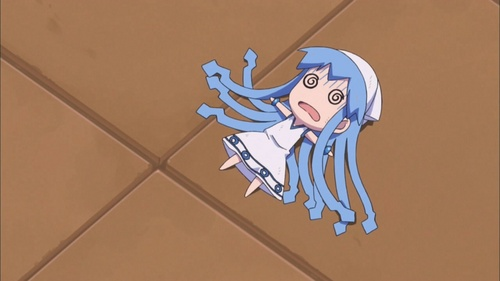